In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path
sns.set(style='darkgrid')

In [2]:
# import dataset
df_load = pd.read_csv(r"D:\kuliah\data expert\csv\churn_telco_final.csv")

In [3]:
# tampilkan bentuk dari dataset
df_load.shape

(6950, 13)

In [4]:
# tampilan 5 data teratas
print(df_load.head())

   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No  
2   Yes 

In [5]:
# tampilan jumlah ID yang unik
df_load.customerID.nunique()

6950

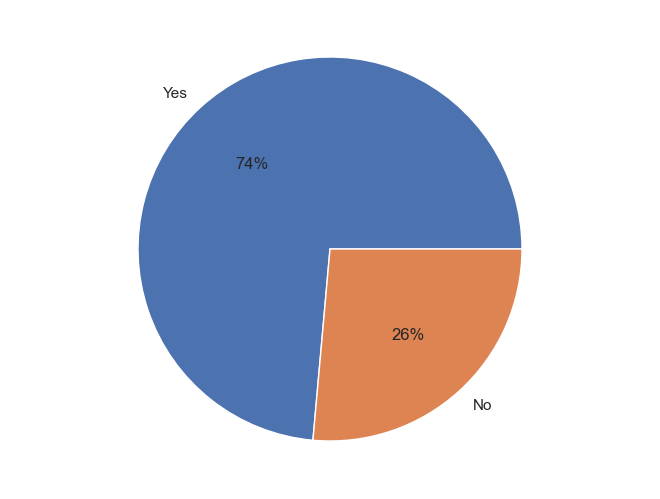

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes', 'No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

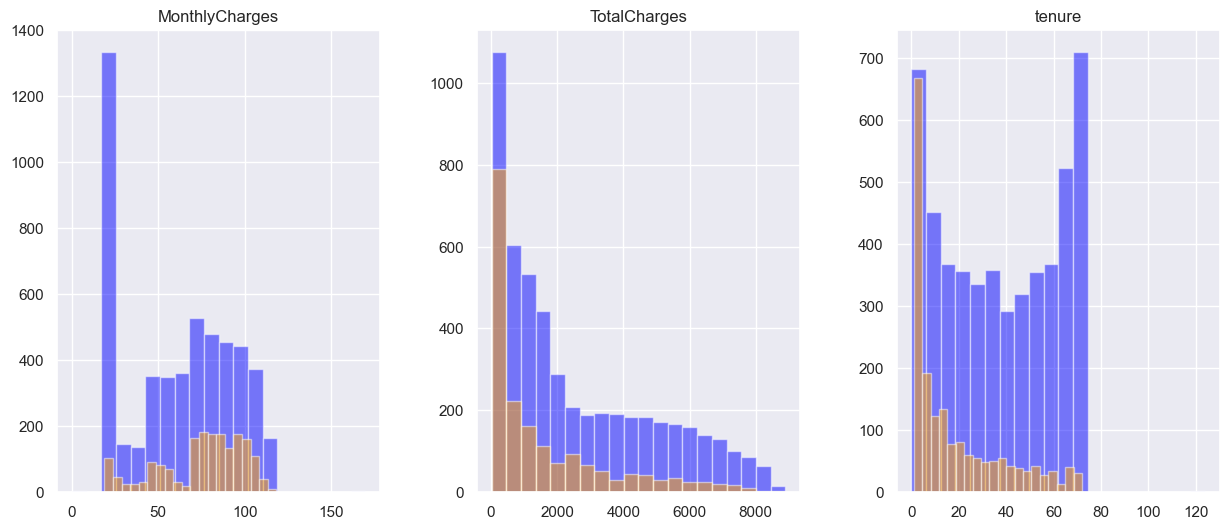

In [7]:
# creating bin in chart
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1, 3, figsize=(15,6))

# use the following code to plot two overlays of histogram per each numercal_feature, use a color of blue
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

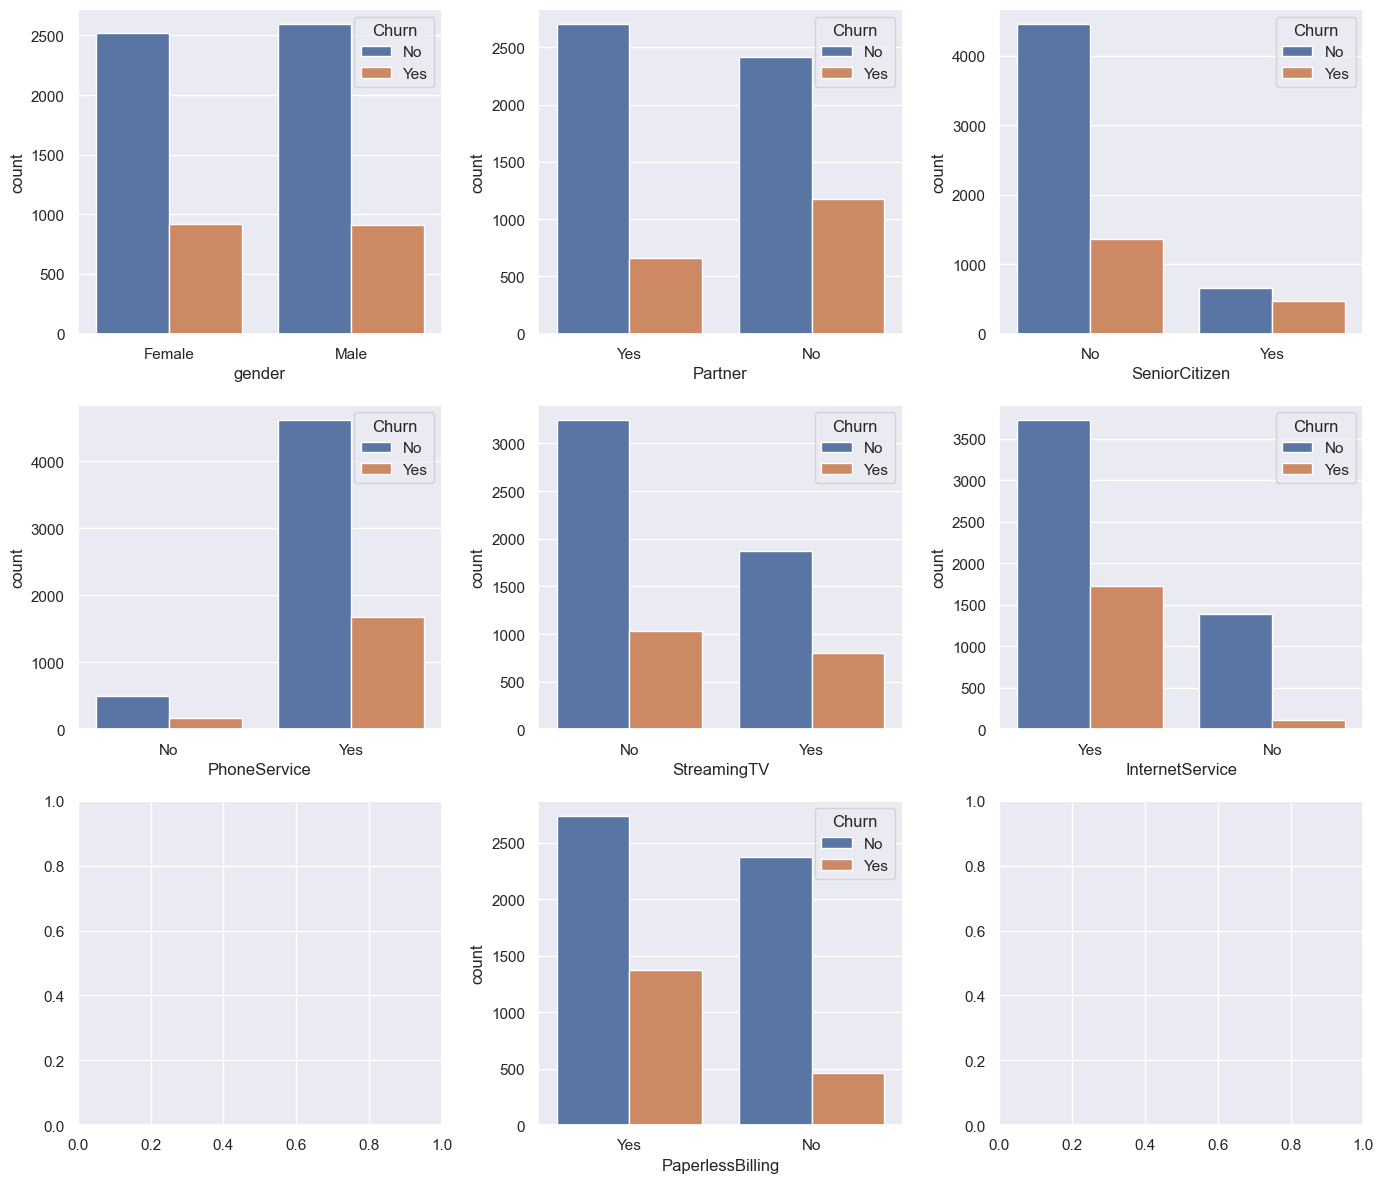

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(14,12))
sns.countplot (data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot (data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot (data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot (data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot (data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot (data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot (data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [9]:
# remove unnecessary columns customerID & UpdateAt
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [10]:
# convert all the non-numeric columns to numerical types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # perform encoding for each non-numeric column        
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

C:\Users\koman\AppData\Local\Temp\ipykernel_14068\638522084.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


In [11]:
# predictor dan target 
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# print according to the expected result
print(f'Jumlah bares dan kolom dari x_train adalah:{x_train.shape},sedangkan jumlah baris dan kolom dari y_train adalah:{ y_train.shape}')
print('Presentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print(f'Jumlah baris dan kolom dari x_test adalah:{x_test.shape}, sedangkan jumlah baris dan kolom dari y_test adalah:{y_test.shape}')
print('Presentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah bares dan kolom dari x_train adalah:(4865, 10),sedangkan jumlah baris dan kolom dari y_train adalah:(4865,)
Presentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah:(2085, 10), sedangkan jumlah baris dan kolom dari y_test adalah:(2085,)
Presentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


In [12]:
# pembuatan model 
log_model = LogisticRegression().fit(x_train, y_train)

C:\Users\koman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
y_pred = log_model.predict(x_test)

In [14]:
print(f'Model Logistic Regression yang terbentuk adalah:({log_model}) \n')
print(classification_report(y_test, y_pred))

Model Logistic Regression yang terbentuk adalah:(LogisticRegression()) 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085

